<h1>Lending club case study</h1>

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#reading data
loan_info = pd.read_csv('E:\\Pinkal\\Upgrad_PG_AIML\\Exploratory Data Analysis\\loan.csv', dtype='unicode')

In [4]:
#display data
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
loan_info.shape

(39717, 111)

<h1> Data Cleaning </h1>
Data cleaning includes 
<ol> Identify and eliminate null values</ol>
<ol> Identify and handle missing values</ol>
<ol> Identify and standardize values</ol>
<ol> Identify and eliminate outliers</ol>


In [6]:
loan_info.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


<h3> Observation: a lot of columns is having null values. So those columns need to be removed.</h3>

In [7]:
loan_info.dropna(axis = 1, how = 'all', inplace = True)
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0


Some single valued columns are there which are not useful in the analysis. So those columns need to removed.

In [8]:
loan_info = loan_info.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d',
                                                           'mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [9]:
loan_info = loan_info.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [10]:
loan_info = loan_info.drop(['emp_title'], axis=1)

In [11]:
loan_info.shape

(39717, 40)

The goal of EDA is to predict the defaulters and this can be done depending on Fully paid or charged off loans. So records having loan status with "Current" needs to be removed from the dataset.

In [12]:
loan_info = loan_info[loan_info.loan_status != "Current"]

In [13]:
#check for missing values again
loan_info.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

<h3>Data Standardization</h3>
<ol>Remove '%' from int_rate column</ol>
<ol>Remove 'months' from term column</ol>

In [14]:
loan_info.int_rate = pd.to_numeric(loan_info.int_rate.apply(lambda x : x.split('%')[0]))
loan_info.term = pd.to_numeric(loan_info.term.apply(lambda x : x.split('months')[0]))
loan_info.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,...,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,...,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,...,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0


<h3> Identify and handle Outliers</h3>

In [15]:
loan_info['annual_inc'] = pd.to_numeric(loan_info['annual_inc'])

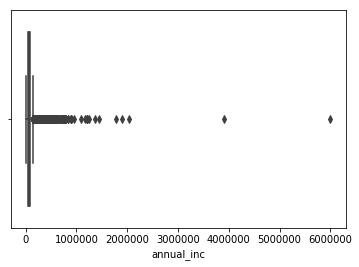

In [16]:
sns.boxplot(loan_info['annual_inc'])

From the above figure, it is obvious that we have outliers in annual_inc column. So we need to check the quantile info.

In [17]:
quantile_info_annual_inc = loan_info.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info_annual_inc

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

There is huge increase of values after 95 percentile. Hence, considering 95 percentile as upper threshold.

In [18]:
annual_inc_95_percentile = loan_info['annual_inc'].quantile(0.95)
loan_info = loan_info[loan_info.annual_inc <= annual_inc_95_percentile]

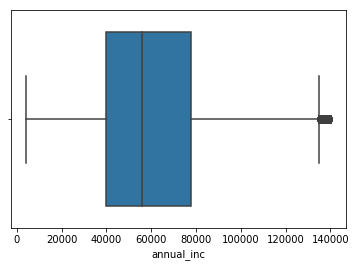

In [19]:
sns.boxplot(loan_info.annual_inc)

Other numerical columns like dti, loan_amnt, funded_amnt_inv etc. need to be analyzed. Before analyzing, we need to update the datatypes.

In [20]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
loan_info[columns] = loan_info[columns].astype(np.float)

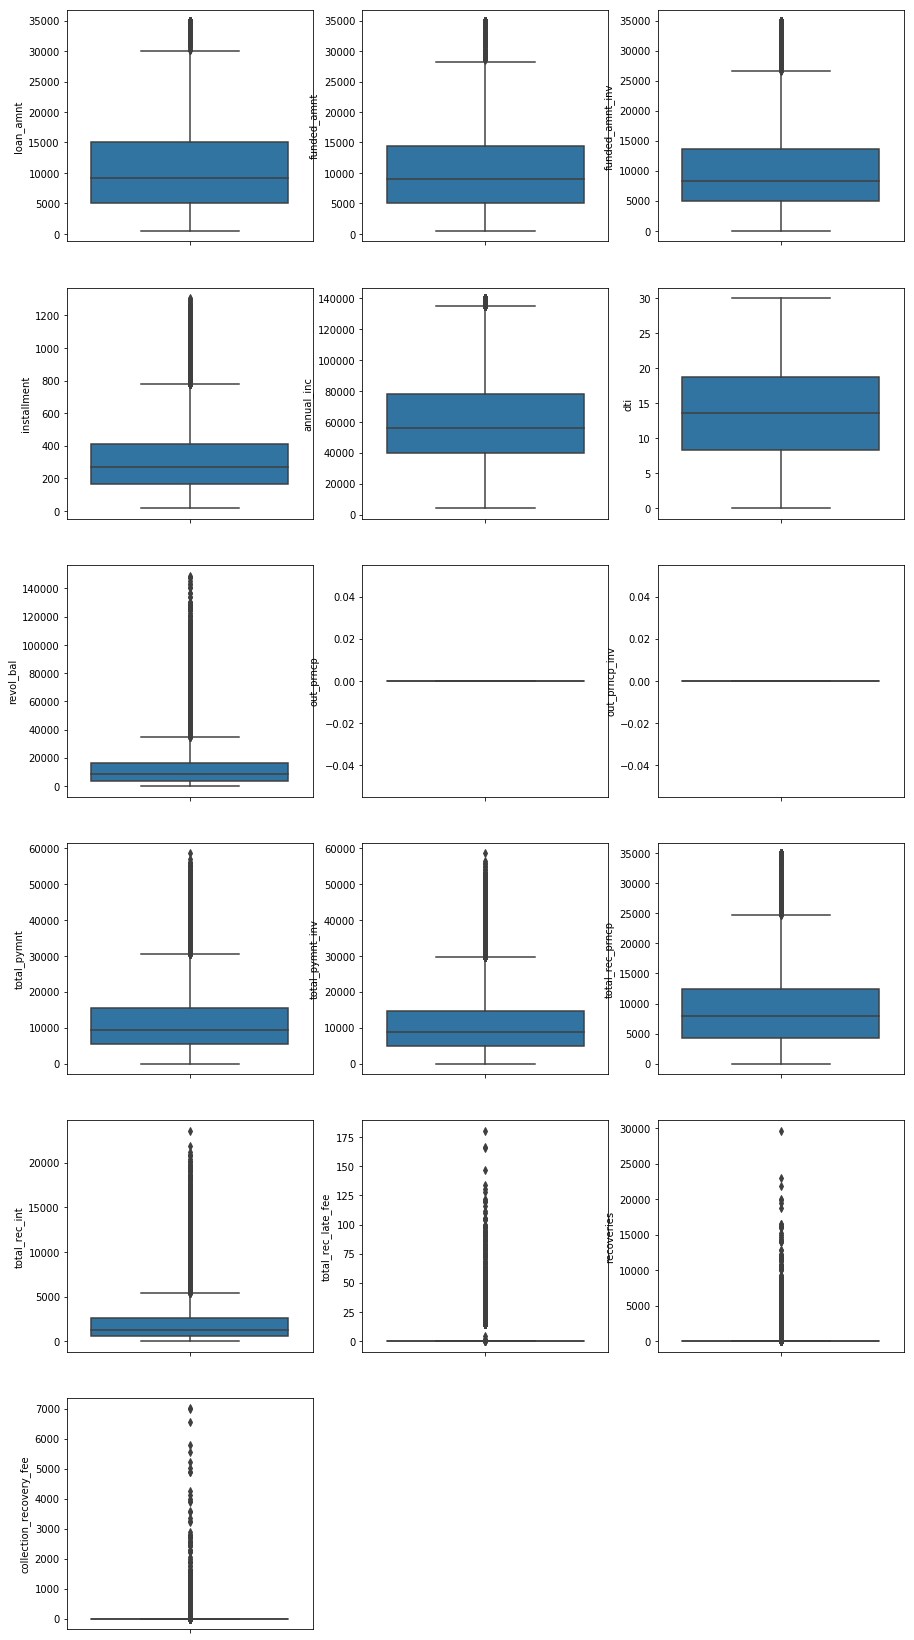

In [21]:
plt.figure(figsize=(15,40))


for i in range(len(columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=columns[i], data=loan_info)

plt.show()

So from the above figures, we can see that outliers exist for collection_recovery_fee, recoveries, total_rec_late_fee, total_rec_int, out_prncp, out_prncp_inv, revol_bal columns. But these columns cannot be the decider loan approval. Hence, ignoring these columns. For other columns, the distribution looks somewhat continuos and so no need to remove outliers.

<h2>Create Derived columns if possible</h2>

In [22]:
loan_info['emp_work_exp'] = loan_info['emp_length'].str.rstrip('years ')
loan_info['emp_work_exp'].replace({'10+': '10'}, inplace=True)
loan_info['emp_work_exp'][loan_info['emp_work_exp'] == '< 1'] = '0.5'
del loan_info['emp_length']

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
loan_info['issue_month'], loan_info['issue_year'] = loan_info[
    'issue_d'].str.split('-').str

loan_info['last_credit_pull_month'], loan_info['last_credit_pull_year'] = loan_info[
    'last_credit_pull_d'].str.split('-').str

loan_info['last_pymnt_month'], loan_info['last_pymnt_year'] = loan_info[
    'last_pymnt_d'].str.split('-').str

loan_info['earliest_cr_line_month'], loan_info['earliest_cr_line_year'] = loan_info[
    'earliest_cr_line'].str.split('-').str

In [62]:
#delete 2 columns
del loan_info['out_prncp']
del loan_info['out_prncp_inv']

In [63]:
#final dataset for EDA
df = loan_info

<h1>Univariate Analysis</h1>

In [25]:
df["loan_status"].value_counts()

Fully Paid     31236
Charged Off     5418
Name: loan_status, dtype: int64

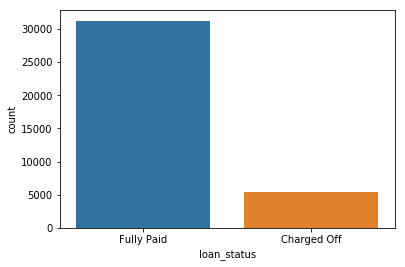

In [26]:
sns.countplot(df['loan_status'])

<h3>Conclusion</h3>
    1. Most of the loans are Fully paid.
    2. Charged Off loan is only 14.78% of total loans

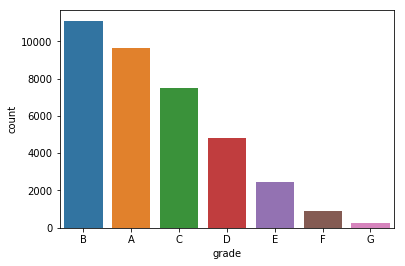

In [30]:
sns.countplot(x=df['grade'], order = df['grade'].value_counts().index)

<h3> Conclusion </h3>
    1. A and B graders are having maximum number of loans. Hence, most of the loans are high graded.

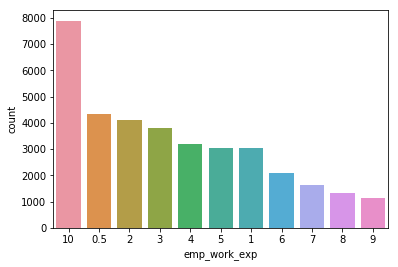

In [31]:
sns.countplot(df['emp_work_exp'], order = df['emp_work_exp'].value_counts().index)

<h3> Conclusion </h3>
    1. Employees having 10 or more years of experience are having most number of loans.

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


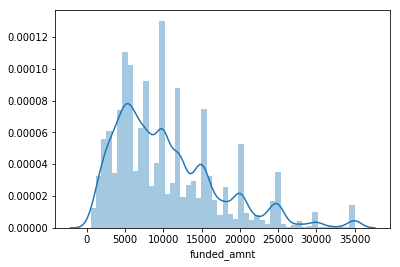

In [34]:
sns.distplot(df['funded_amnt'])

<h3> Conclusion </h3>
Majority of the funded amount for loan is 5 Lacs.

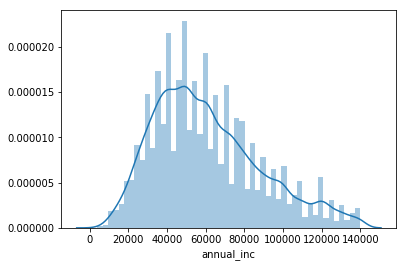

In [35]:
sns.distplot(df['annual_inc'])

<h3> Conclusion </h3>
Most of the loan applicants have annual income of 5 lacs or less.

<h1> Segmented Univariate Analysis </h1>

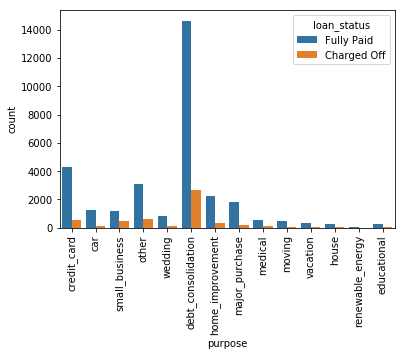

In [37]:
sns.countplot(x=df['purpose'], hue=df["loan_status"])
plt.xticks(rotation=90)
plt.show()

<h3> Conclusion </h3>
Most of the loans are given for debt_consolidation purpose. Also most of them are fully paid.

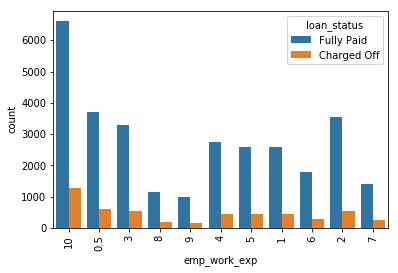

In [42]:
sns.countplot(x=df['emp_work_exp'], hue=df["loan_status"])
plt.xticks(rotation=90)
plt.show()

<h3> Conclusion </h3>
Most of the employees having 10 or more years experience have fully paid the loan.

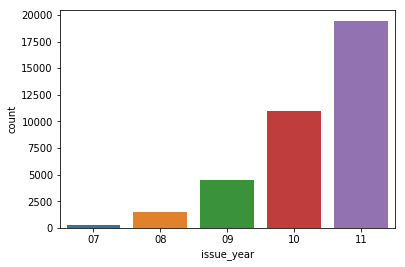

In [44]:
sns.countplot(df['issue_year'], data=df[df.loan_status == 'Charged Off'])

<h3> Conclusion </h3>
The year 2011 sees a higher number of Charged Off loans.

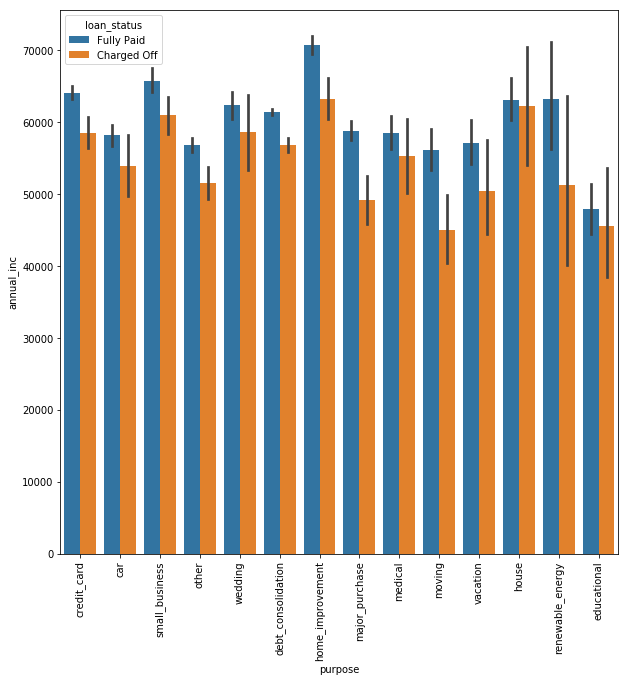

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,y='annual_inc', x='purpose', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()

<h3> Conclusion </h3>
Employees having higher salary opted for loan for home_improvment, small_business, credit_card, house, renewable_energy purposes.

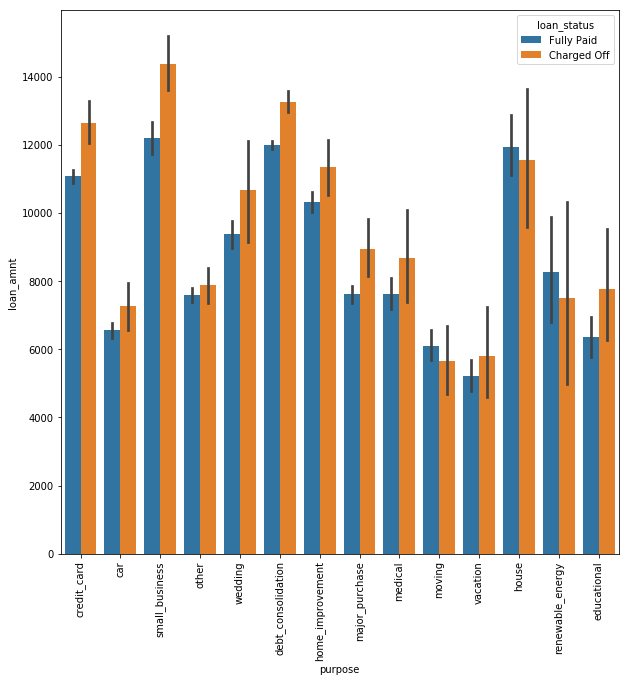

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,y='loan_amnt', x='purpose', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()

<h3> Conclusion </h3>
Higher loan amounts are approved for small_business, credit_card,debt_consolidation and house purposes. There are more defaulters also for these purposes.

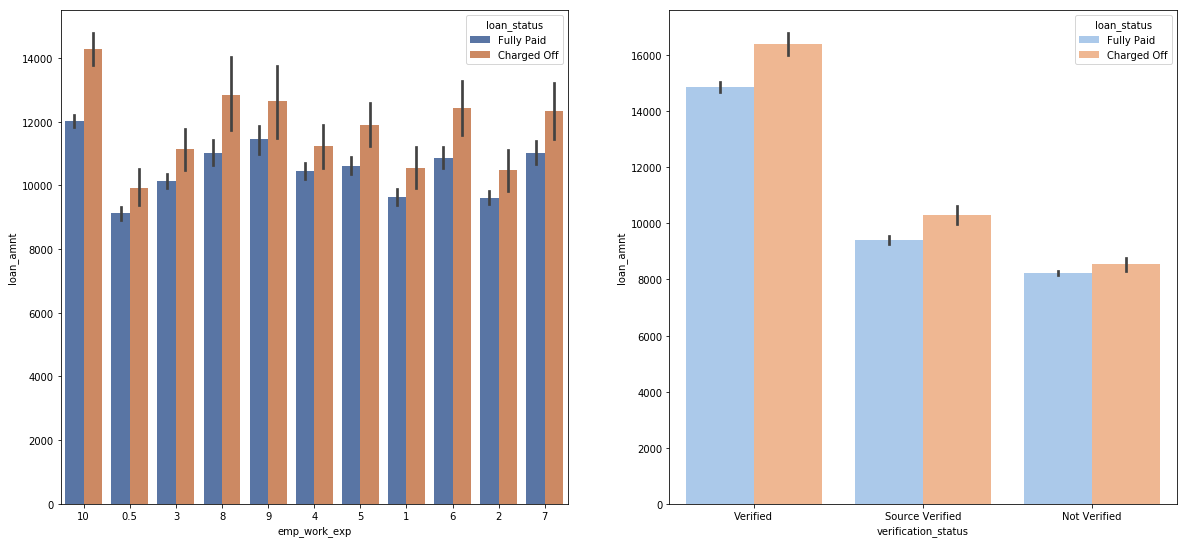

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df,y='loan_amnt', x='emp_work_exp', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

<h3> Conclusion </h3>
Employees having more experience are getting loan for higher amount, but there are high chance of loan being defaulted. Accordingly, verified applicants are getting loan of high amount, but the probability of defaulting the loan is high.

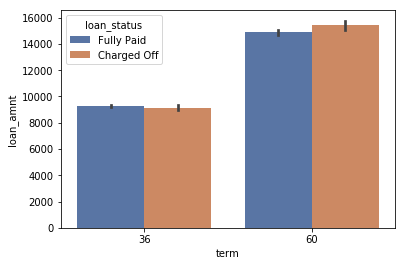

In [55]:
sns.barplot(data =df,y='loan_amnt', x='term', hue ='loan_status',palette="deep")

<h3> Conclusion </h3>
Most of the applicants opting for high amount of loans having 60 months or more terms are defaulting more than loans taken against small terms.

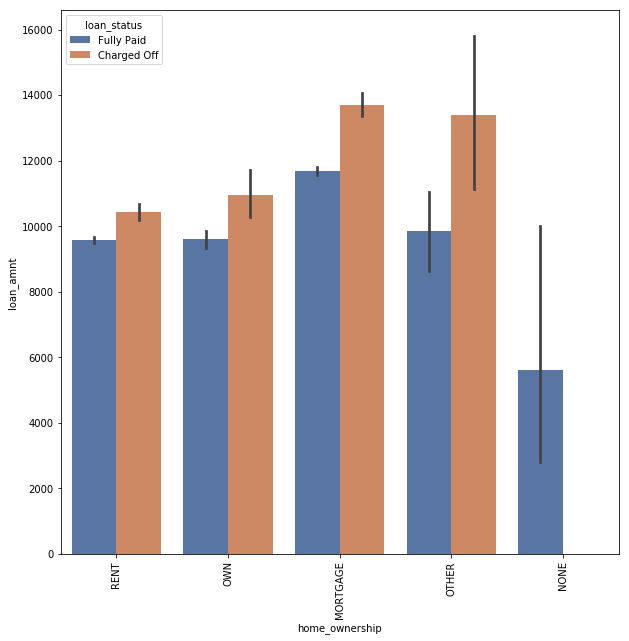

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="deep")
plt.xticks(rotation=90)
plt.show()

<h3> Conclusion </h3>
Applicants having home_ownership as Mortgage have high chance of defaulting.

<h1> Bivariate Analysis </h1>

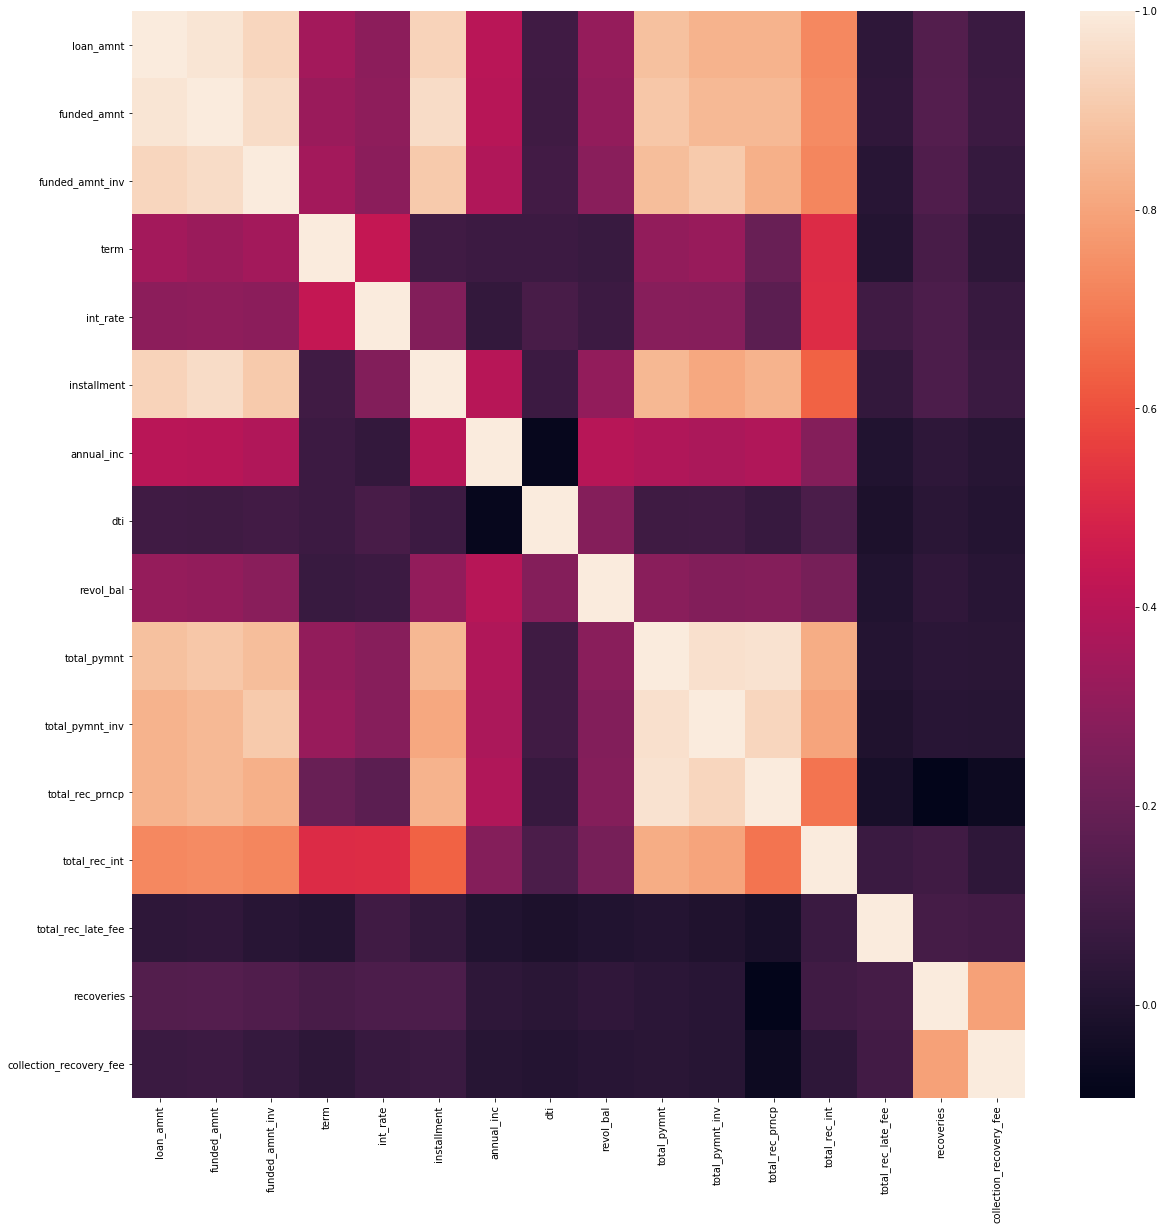

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())
plt.show()

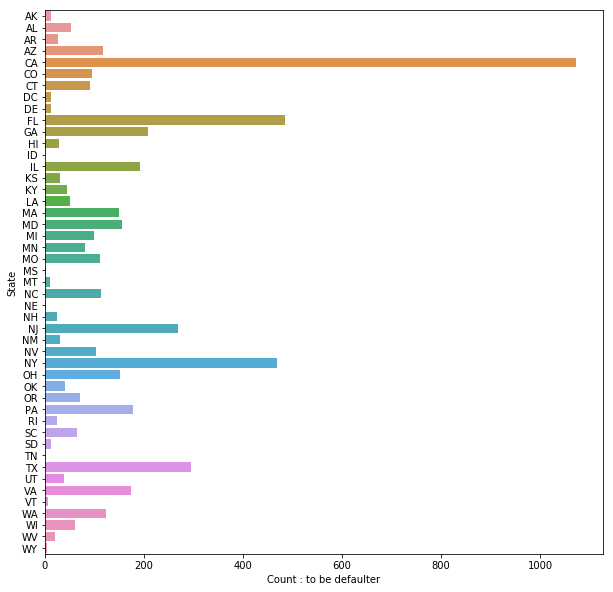

In [68]:
state = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=country)
plt.xlabel('Count : to be defaulter')
plt.ylabel('State')
plt.show()

<h3> Conclusion </h3>
Applicants staying in CA state have the high chance to be loan defaulter.